# Analysis of the Scraping Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_excel('../results/filtred_papers.xlsx')

In [3]:
df.head(2)

,Title,URL,Abstract,Source,Year,is_relevent,Verdict
0,Towards comprehensive testing on the robustnes...,https://openaccess.thecvf.com/content/CVPR2022...,While deep neural networks (DNNs) have strengt...,Computer Vision Foundation (CVF),2022,1,The abstract discusses adversarial attacks on ...
1,Marnet: Backdoor attacks against cooperative m...,https://ieeexplore.ieee.org/abstract/document/...,Recent works have revealed that backdoor attac...,IEEE,2022,1,The abstract discusses adversarial attacks (ba...


In [4]:
# count number of missing values per column
df.isnull().sum() / len(df)

Title          0.0
URL            0.0
Abstract       0.0
Source         0.0
Year           0.0
is_relevent    0.0
Verdict        0.0
dtype: float64

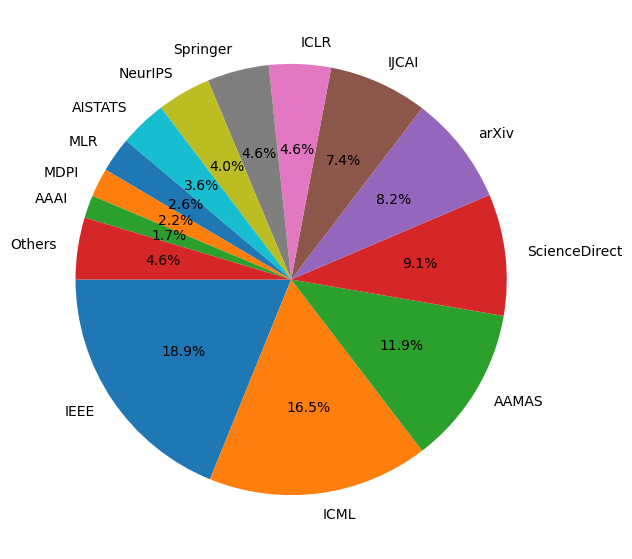

In [5]:
# pie chart of the number of papers per Source, show the sources with less than 1% as 'Others'
n_df = df['Source'].value_counts()
threshold = len(df) * 0.01  # 1% threshold
n_df['Others'] = n_df[n_df < threshold].sum()
n_df = n_df[n_df >= threshold]

plt.figure(figsize=(7, 7))
plt.pie(n_df, labels=n_df.index, autopct='%1.1f%%', startangle=180)
# plt.title('Percentage of papers per Source')
plt.show()

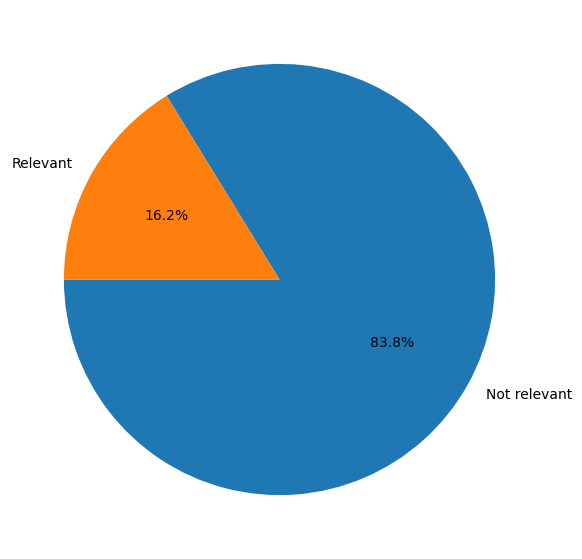

In [6]:
# plot pie chart of is_relevant (0 or 1)
plt.figure(figsize=(7, 7))
plt.pie(df['is_relevent'].value_counts(), labels=['Not relevant', 'Relevant'], autopct='%1.1f%%', startangle=180)
# plt.title('Percentage of relevant papers (based on LLM evaluation)')
plt.show()

In [7]:
# filter out irrelevant papers
df = df[df['is_relevent'] == 1]
df.drop('is_relevent', axis=1, inplace=True)

In [8]:
# size of the dataset
len(df)

105

In [9]:
# load the data
df = pd.read_excel('../results/merged_results.xlsx')

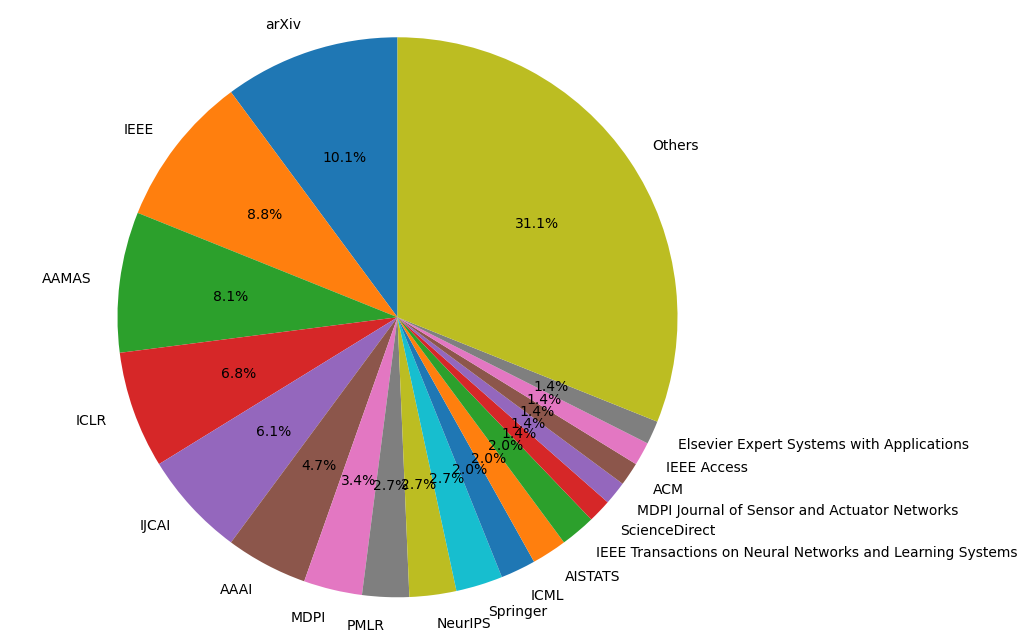

In [10]:
plt.figure(figsize=(10, 8))
# get sources with less than 2 papers
n_df = df['Source'].value_counts()
threshold = 2
n_df['Others'] = n_df[n_df < threshold].sum()
n_df = n_df[n_df >= threshold]  # keep only sources with 2 or more papers

# Create pie chart
plt.pie(n_df, labels=n_df.index, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Papers by Source')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


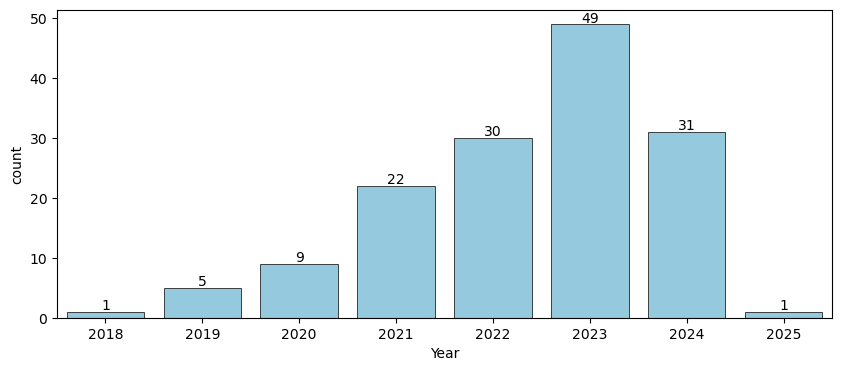

In [11]:
# barplot of the number of papers per Year (vertical)
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), color='skyblue', edgecolor='black', linewidth=0.5)
# add number of papers per Year on the top of each bar
for i, v in enumerate(df['Year'].value_counts(sort=False).sort_index()):
    plt.text(i, v+1, v, ha='center', va='center')
# plt.title('Number of papers per Year')
plt.show()

In [12]:
# import old_results
old_results = pd.read_excel('../results/old_results.xlsx')

In [13]:
# using titles, find te number of papers in old_results that are in not in df
count = 0
for title, is_relevant in zip(old_results['Abstract'], old_results['is_relevent']):
    if is_relevant == 0:
        continue 
    if title not in df['Abstract'].values:
        count += 1
        print(title[:50])
print("% of papers in old_results that are not in df:", count )

% of papers in old_results that are not in df: 0


In [14]:
# merge old_results with df in a new dataframe (df2)
cols = ['Title', 'Source', 'Year', 'Abstract','URL', 'is_relevent']
df2 = pd.merge(df, old_results[cols], on='Title', how='outer')
# merge x and y columns
df2['Source'] = df2['Source_x'].fillna(df2['Source_y'])
df2['Year'] = df2['Year_x'].fillna(df2['Year_y'])
df2['Abstract'] = df2['Abstract_x'].fillna(df2['Abstract_y'])
df2['URL'] = df2['URL_x'].fillna(df2['URL_y'])
df2.drop(['Source_x', 'Source_y', 'Year_x', 'Year_y', 'Abstract_x', 'Abstract_y', 'URL_x', 'URL_y', 'is_relevent'], axis=1, inplace=True)

In [15]:
df2.sort_values('Title', ascending=False, inplace=True)

In [16]:
df2.head()

,Title,Q Index,Verdict,Source,Year,Abstract,URL
14,learning system with time-delayed data transmi...,Q2,The abstract discusses gradient-based adversar...,MDPI Journal of Sensor and Actuator Networks,2022,Abstract:This paper studies the gradient-based...,https://www.mdpi.com/2224-2708/11/3/45
5,c-MBA: Adversarial attack for cooperative MARL...,A*,The paper focuses on evaluating the robustness...,NeurIPS,2022,"In recent years, a proliferation of methods we...",https://openreview.net/forum?id=AFfKSfcF6Sv
111,[PDF][PDF] Improving Intrusion Detection Syste...,NaN,The abstract mentions the use of Multi-Agent D...,www.scitepress.org,2023,Intrusion detection is a crucial task in the f...,https://www.scitepress.org/Papers/2023/121246/...
97,[PDF][PDF] Decentralized Anomaly Detection in ...,NaN,The abstract discusses the problem of detectin...,www.ijcai.org,2023,We consider the problem of detecting adversari...,https://www.ijcai.org/proceedings/2023/0019.pdf
122,[HTML][HTML] Multi-agent reinforcement learnin...,NaN,The abstract mentions the use of a Multiagent ...,MDPI,2021,Abstract:The fast emergence of IoT devices and...,https://www.mdpi.com/2227-7080/9/3/44
